Christian Hansen  
02/03/2017  
Project 02: Luther  
Scraping indipendent movie databases  

In [153]:
from urllib2 import urlopen
from bs4 import BeautifulSoup
import requests
import pandas as pd
import unicodedata
import re
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Looking at indie movies from two websites

In [3]:
movie_title =[]
movie_url = []
p_num =['','01']
url = 'http://www.imdb.com/list/ls009277148/?start=1{}&view=detail&sort=listorian:asc&defaults=1&scb=0.28501688645281'
for p in p_num:
    url = url.format(p)
    r = requests.get(url) # where url is the above url    
    bs = BeautifulSoup(r.text,'lxml')
    for i in range(100):
        try:
            movie_url.append(bs.findAll('b')[i].find('a')['href'])
            movie_title.append(bs.findAll('b')[i].findNext('a').text)
        except:
            movie_url.append(np.nan)
            movie_title.append(np.nan)

In [4]:
movie_title_2 =[]
movie_url_2 = []
p_num =['','01']
url = 'http://www.imdb.com/list/ls031435616/?start=1{}&view=detail&sort=listorian:asc'
for p in p_num:
    url = url.format(p)
    r = requests.get(url) # where url is the above url    
    bs = BeautifulSoup(r.text,'lxml')
    for i in range(100):
        try:
            movie_title_2.append(bs.findAll('b')[i].findNext('a').text)
            movie_url_2.append(bs.findAll('b')[i].find('a')['href'])
        except: 
            movie_url_2.append(np.nan)
            movie_title_2.append(n.nan)

In [5]:
movie_url_total= movie_url + movie_url_2
movie_title_total = movie_title + movie_title_2

In [6]:
len(set(movie_title_total))

197

In [7]:
url_total = ["http://www.imdb.com" + str(url_end) for url_end in movie_url_total]

In [8]:
len(set(url_total))

197

In [9]:
budget_list = []
gross_list= []
runtime_list = []
imdb_list = []
number_list = []
meta_list = []
year_list = []
for i in range(len(url_total)):
    page = requests.get(url_total[i]).text
    bs_temp = BeautifulSoup(page,'lxml')
    try:
        budget = (bs_temp.find(text = 'Budget:').next).strip().replace('$','').replace(',','')
        gross = bs_temp.find(text = 'Gross:').next.strip().replace('$','').replace(',','')
        runtime =bs_temp.find(text = 'Runtime:').findNext("").text.split()[0]
        imdb_scores =bs_temp.find('span',attrs={'itemprop':'ratingValue'}).text
        number_votes = bs_temp.find('span',attrs={'itemprop':'ratingCount'}).text
        meta_score = bs_temp.find(class_ = 'titleReviewBarItem').find('span').text
        year = bs_temp.find(id= 'titleYear').text.strip('()')
        
        meta_list.append(meta_score)
        number_list.append(number_votes)
        imdb_list.append(imdb_scores)
        budget_list.append(budget)
        gross_list.append(gross)
        runtime_list.append(runtime)
        year_list.append(year)
    except:
        budget_list.append(np.nan)
        meta_list.append(np.nan)
        number_list.append(np.nan)
        imdb_list.append(np.nan)
        gross_list.append(np.nan)
        runtime_list.append(np.nan)
        year_list.append(np.nan)

In [12]:
df = pd.DataFrame([movie_title_total,meta_list,number_list,imdb_list,budget_list,gross_list,runtime_list,year_list]).T
df.columns = ['movie_title','meta_score' ,'number_of_votes','imdb_score','budget','gross','runtime','year']

In [17]:
df = df.dropna()

In [18]:
pickle.dump(df, open('indie_df.p', 'wb'))

,movie_title,meta_score,number_of_votes,imdb_score,budget,gross,runtime,year
2,Ghost World,88,"98,616",7.4,7000000,6200756,111,2001
3,(500) Days of Summer,76,"390,774",7.7,7500000,32391374,95,2009
9,Seven Psychopaths,66,"192,604",7.2,15000000,14989761,110,2012
10,"Jeff, Who Lives at Home",60,"56,901",6.5,10000000,4244155,83,2011
12,Hamlet 2,54,"15,315",6.4,9000000,4881867,92,2008
13,The Way Way Back,68,"119,825",7.4,5000000,21501098,103,2013
14,Son of Rambow,66,"27,550",7.0,£4000000,1784769,96,2007
16,Garden State,67,"190,481",7.6,2500000,26781723,102,2004
17,Rushmore,86,"139,122",7.7,9000000,17096053,93,1998
18,The Science of Sleep,70,"62,532",7.3,6000000,4663809,105,2006


In [211]:
import pickle
file = open("indie_df.p",'rb')
loaded_df = pickle.load(file)
file.close()
loaded_df.shape

(250, 8)

In [212]:
clean_df = loaded_df

In [213]:
clean_df.head()

,movie_title,meta_score,number_of_votes,imdb_score,budget,gross,runtime,year
2,Ghost World,88,"98,616",7.4,7000000,6200756,111,2001
3,(500) Days of Summer,76,"390,774",7.7,7500000,32391374,95,2009
9,Seven Psychopaths,66,"192,604",7.2,15000000,14989761,110,2012
10,"Jeff, Who Lives at Home",60,"56,901",6.5,10000000,4244155,83,2011
12,Hamlet 2,54,"15,315",6.4,9000000,4881867,92,2008


In [214]:
def clean_funct(score):
    if str(score).isdigit():
        return(score)
    else:
        return(np.nan)

In [215]:
def clean_and_int(val):
    if type(val) == unicode:
        if len(val.split(' ')) == 2 and val.isdigit() :
            return(int(val.split(' ')[1]))

        elif len(val.split(' ')) ==1 and val.isdigit():
            return(int(val.split(' ')[0]))
        else:
            return(np.nan)
    elif type(val) == float:
        return(val)
    else:
        print 'not unicode'
        print type(val), val
        return(np.nan)

In [216]:
clean_df['meta_score'] = clean_df['meta_score'].apply(clean_and_int)
clean_df['number_of_votes'] = clean_df['number_of_votes'].apply(lambda x: float(str(x).replace(',','')))
clean_df['imdb_votes'] = clean_df['imdb_score'].apply(lambda x: float(x))
clean_df['budget'] = clean_df['budget'].apply(clean_and_int)
clean_df['Adjusted_gross'] = clean_df['gross'].apply(lambda x: float(x))

In [ ]:
"""pickle.dump(clean_df, open('df_indie.p', 'wb'))
clean_df.head()"""

In [217]:
## draw smaller sample from big set 500 or less to compare the two datasets
## look at how budget influences indi movies versus bigger more popular movies

In [218]:
clean_df['year']= clean_df['year'].apply(lambda x: int(x))

In [219]:
conversion = pd.read_csv('conversion.txt',delimiter='\t')
conversion.columns = ['year','Avg. Price']
conversion.ix[0,'Avg. Price'] = "8.65"
conversion['Avg. Price'] = conversion['Avg. Price'].apply(lambda x: float(x.strip('$'))) 
conversion['rate'] = conversion['Avg. Price']/conversion.ix[1,'Avg. Price'] 
conversion.head()
#revenue/rate

,year,Avg. Price,rate
0,2017,8.65,1.000000
1,2016,8.65,1.000000
2,2015,8.43,0.974566
3,2014,8.17,0.944509
4,2013,8.13,0.939884


In [220]:
clean_df = pd.merge(clean_df,conversion,how='left', on='year')
clean_df['est_tickets'] = clean_df['Adjusted_gross']/clean_df['Avg. Price']
clean_df['Adjusted_gross'] = clean_df['est_tickets']*clean_df['Avg. Price']
#clean_df['Adjusted_gross'] = clean_df['Adjusted_gross']/clean_df['rate_x']
clean_df['runtime'] = clean_df['runtime'].apply(lambda x: int(x))
#clean_df['genre_list'] =clean_df['genre'].apply(lambda x: len(x))
#clean_df['budget'] = budget_list
clean_df['meta_score'] = clean_df['meta_score'].apply(lambda x: float(x)/10)
clean_df['imdb_score'] = clean_df['imdb_score'].apply(lambda x: float(x))

In [221]:
clean_df.dropna(inplace = True)
clean_df

,movie_title,meta_score,number_of_votes,imdb_score,budget,gross,runtime,year,imdb_votes,Adjusted_gross,Avg. Price,rate,est_tickets
0,Ghost World,8.8,98616.0,7.4,7000000.0,6200756,111,2001,7.4,6200756.0,5.66,0.654335,1.095540e+06
1,(500) Days of Summer,7.6,390774.0,7.7,7500000.0,32391374,95,2009,7.7,32391374.0,7.50,0.867052,4.318850e+06
2,Seven Psychopaths,6.6,192604.0,7.2,15000000.0,14989761,110,2012,7.2,14989761.0,7.96,0.920231,1.883136e+06
3,"Jeff, Who Lives at Home",6.0,56901.0,6.5,10000000.0,4244155,83,2011,6.5,4244155.0,7.93,0.916763,5.352024e+05
4,Hamlet 2,5.4,15315.0,6.4,9000000.0,4881867,92,2008,6.4,4881867.0,7.18,0.830058,6.799258e+05
5,The Way Way Back,6.8,119825.0,7.4,5000000.0,21501098,103,2013,7.4,21501098.0,8.13,0.939884,2.644662e+06
7,Garden State,6.7,190481.0,7.6,2500000.0,26781723,102,2004,7.6,26781723.0,6.21,0.717919,4.312677e+06
8,Rushmore,8.6,139122.0,7.7,9000000.0,17096053,93,1998,7.7,17096053.0,4.69,0.542197,3.645214e+06
9,The Science of Sleep,7.0,62532.0,7.3,6000000.0,4663809,105,2006,7.3,4663809.0,6.55,0.757225,7.120319e+05
10,Whatever Works,4.5,60875.0,7.2,15000000.0,5306447,93,2009,7.2,5306447.0,7.50,0.867052,7.075263e+05


(array([  4.,   6.,  32.,  32.,  34.,  48.,  18.,  22.,  16.,  12.]),
 array([ 3.7 ,  4.27,  4.84,  5.41,  5.98,  6.55,  7.12,  7.69,  8.26,
         8.83,  9.4 ]),
 <a list of 10 Patch objects>)

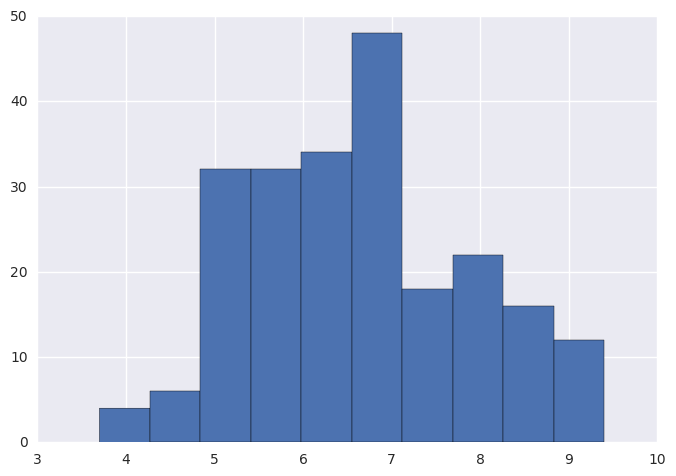

In [222]:
plt.hist(clean_df['meta_score'])

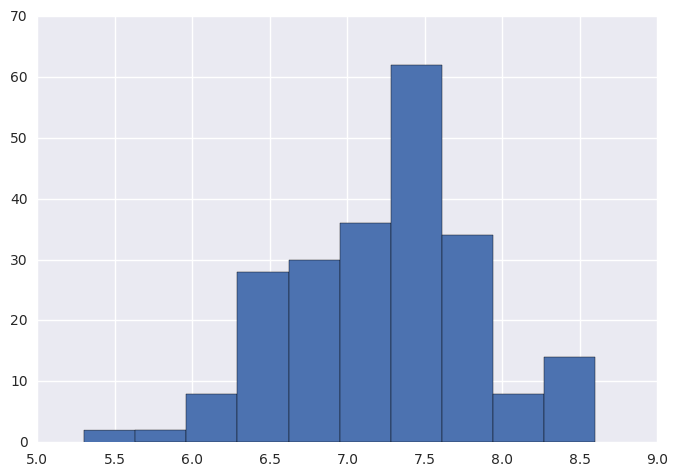

In [223]:
clean_df['imdb_score'].hist()

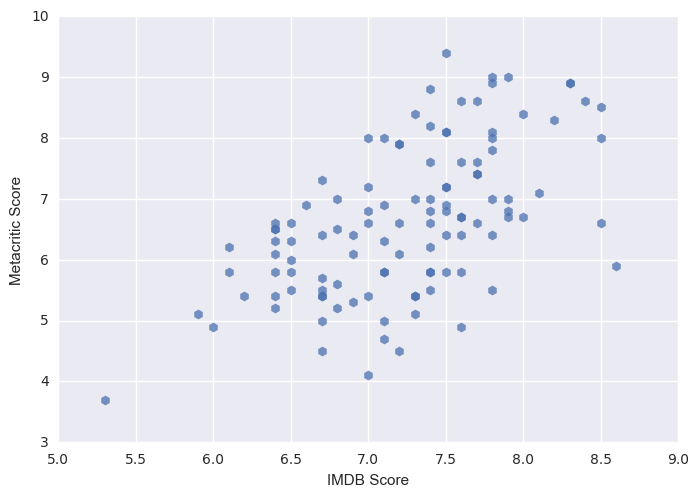

In [263]:
plt.plot(clean_df['imdb_score'],clean_df['meta_score'],'h',alpha = 0.5)
plt.xlabel('IMDB Score')
plt.ylabel('Metacritic Score')

(1972, 2012)

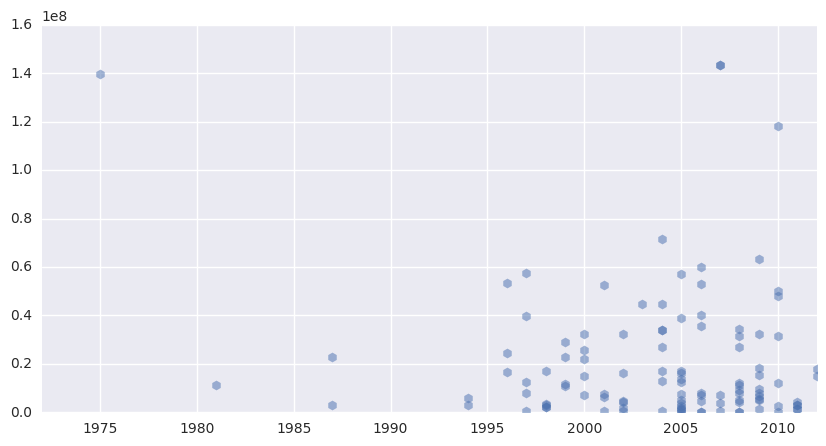

In [225]:
plt.figure(figsize = (10,5))
sort_df = clean_df.sort_values('year')
plt.plot(sort_df['year'],(sort_df['Adjusted_gross']),'h',alpha = 0.3)
plt.xlim([1972,2012])

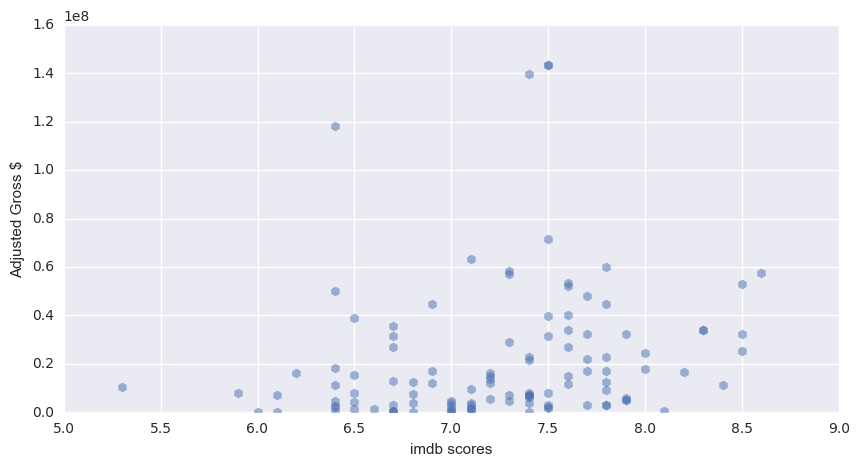

In [226]:
plt.figure(figsize = (10,5))
plt.plot(clean_df['imdb_score'],clean_df['Adjusted_gross'],'h',alpha = 0.3)
plt.xlabel('imdb scores')
plt.ylabel('Adjusted Gross $')

## Running Regression

In [231]:
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Taking a look at the regression using a select few features
clean_df['log_budget'] = np.log10(clean_df['budget'])
clean_df['log_ad_gross'] = np.log10(clean_df['Adjusted_gross'])
clean_df['sqrt_num_votes'] = (clean_df['number_of_votes'].apply(lambda x: int(x)**(1.0/2)))
features =['log_ad_gross','runtime','meta_score','log_budget','number_of_votes','year']
X = clean_df[features]
X['meta_score'] = X['meta_score'].apply(lambda x: float(x))
X['number_of_votes'] = X['number_of_votes'].apply(lambda x: float(x))
y = clean_df['imdb_votes']
X = X[y.notnull()]
y = y[y.notnull()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('rsquared: ', 0.60954506696640465)
('mse: ', 0.17117544264192824)


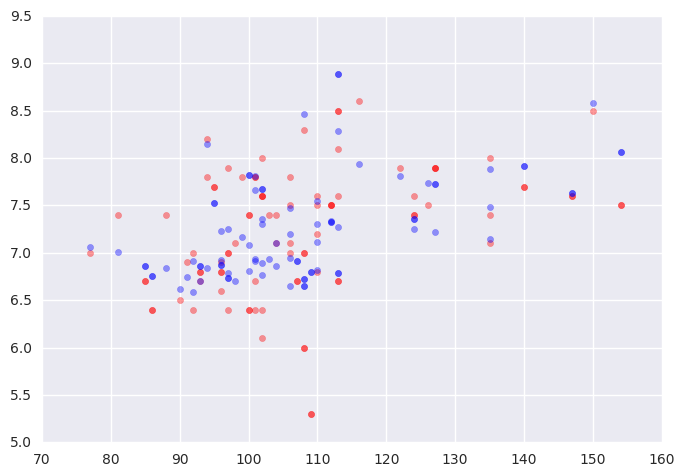

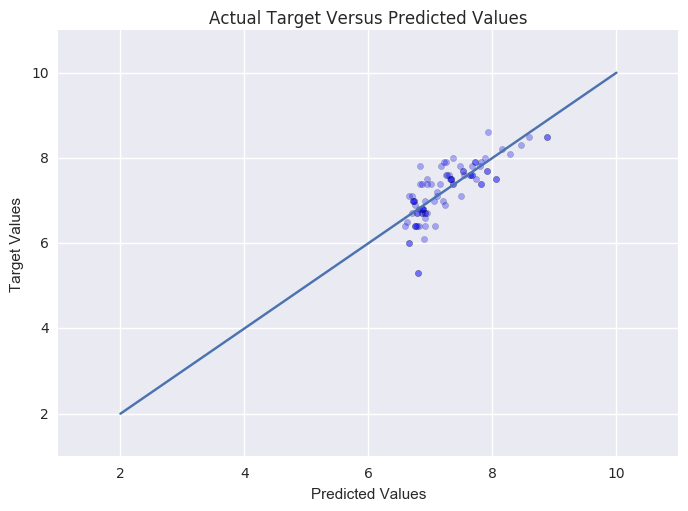

In [232]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter([X_test.iloc[:,1]],y_test,color='red',alpha = 0.4)
plt.scatter([X_test.iloc[:,1]],predictions,color='blue',alpha =0.4)
print('rsquared: ' ,r2_score(y_test,predictions))
print('mse: ', mean_squared_error(y_test,predictions))
plt.show()
plt.plot(np.linspace(2,10,1000),np.linspace(2,10,1000))
plt.scatter(predictions,y_test,alpha = 0.3)
plt.title('Actual Target Versus Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Target Values')

## Random Forest

('rsquared: ', 0.70856168613767989)
('mse: ', 0.12776655679724114)


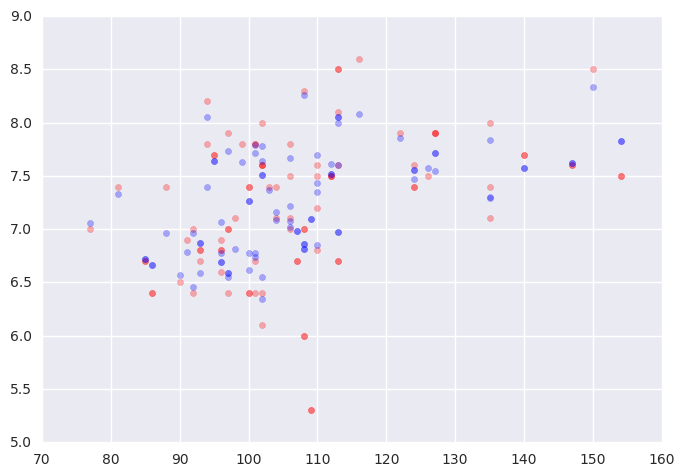

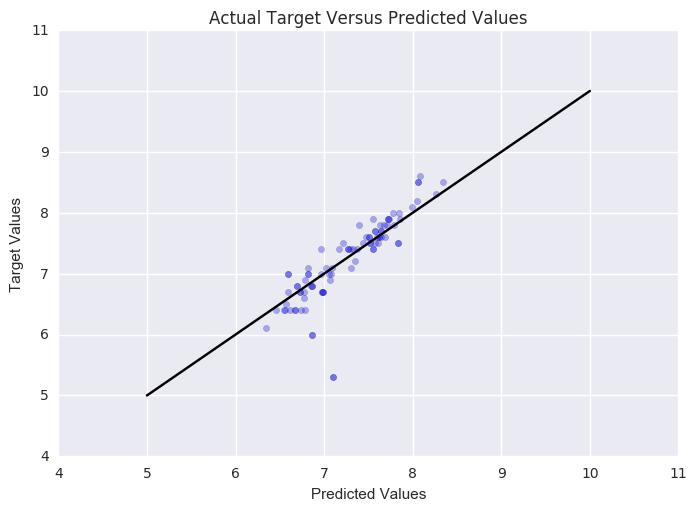

In [233]:
from sklearn.ensemble import RandomForestRegressor
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


## Taking a look at the regression using a select few features

rfmodel2=RandomForestRegressor(n_estimators=1000,min_samples_split=4,min_samples_leaf=1,max_features="sqrt",n_jobs=-1)
rfmodel2.fit(X_train,y_train)
rf2_test_pred = rfmodel2.predict(X_test)

print('rsquared: ' ,r2_score(y_test,rf2_test_pred))
print('mse: ', mean_squared_error(y_test,rf2_test_pred))

plt.scatter([X_test.iloc[:,1]],y_test,color='red',alpha = 0.3)
plt.scatter([X_test.iloc[:,1]],rf2_test_pred,color='blue',alpha = .3)
plt.show()

plt.scatter(rf2_test_pred,y_test,alpha=.3)
plt.plot(np.linspace(5,10,1000),np.linspace(5,10,1000),'k')
plt.title('Actual Target Versus Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Target Values')
#plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.show()

## Gradient Boosting

('mean squared error', 0.082755979935722021)
('rsquared:', 0.73569197120722651)


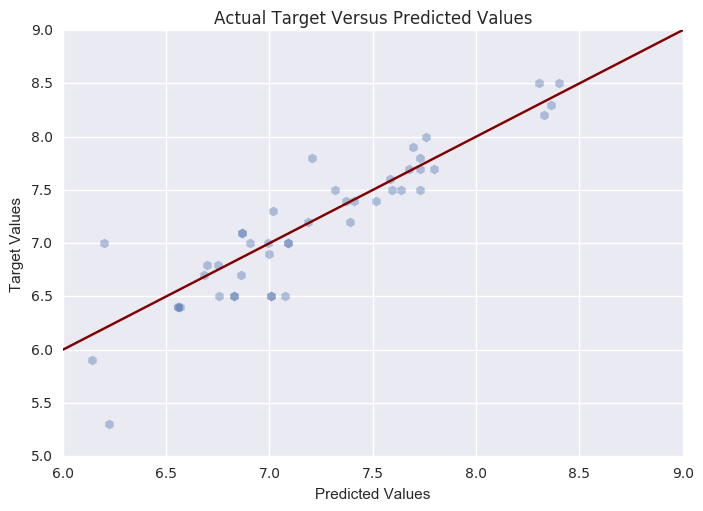

In [266]:
from sklearn.ensemble import GradientBoostingRegressor
gbmodel1 = GradientBoostingRegressor(subsample= 0.1,n_estimators=1000, learning_rate=0.01,max_depth=12,min_samples_split= 4)
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)
print('mean squared error',mean_squared_error(gb1_test_pred,y_test))
print('rsquared:', r2_score(gb1_test_pred,y_test))

plt.plot(gb1_test_pred,y_test,'h',alpha=.4)
plt.plot(np.linspace(6,9,100),np.linspace(6,9,100),'maroon')
plt.title('Actual Target Versus Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Target Values')

## GridsearchCV

In [252]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.0612363565051
0.990451723902


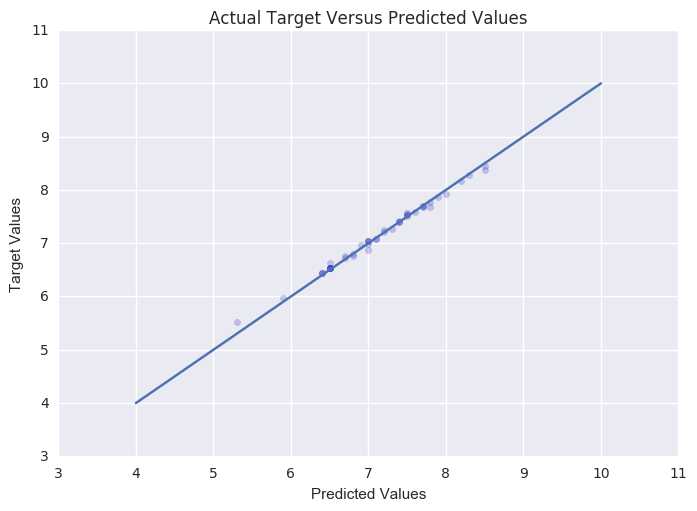

In [257]:
from sklearn.grid_search import RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
kfold = KFold(len(X_train), n_folds=5, shuffle=True, random_state=20)

rfmodel2 = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_list = {
    'n_estimators': [200,300, 700],
    'max_features': ['auto', 'sqrt', 'log2']}

rand = RandomizedSearchCV(rfmodel2, param_list, cv=kfold, n_iter=3, random_state=42)
rand.fit(X, y)
rand.grid_scores_

rand_pred = rand.predict(X_test)
rand.best_params_
print(np.sqrt(np.mean((rand_pred - y_test)**2)))
print(r2_score(rand_pred,y_test))

plt.scatter(y_test, rand_pred,alpha=.2)
plt.plot(np.linspace(4,10,100),np.linspace(4,10,100))
plt.title('Actual Target Versus Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Target Values')

In [ ]:
list(zip(elastic_net_grid_est.best_estimator_.coef_,features))

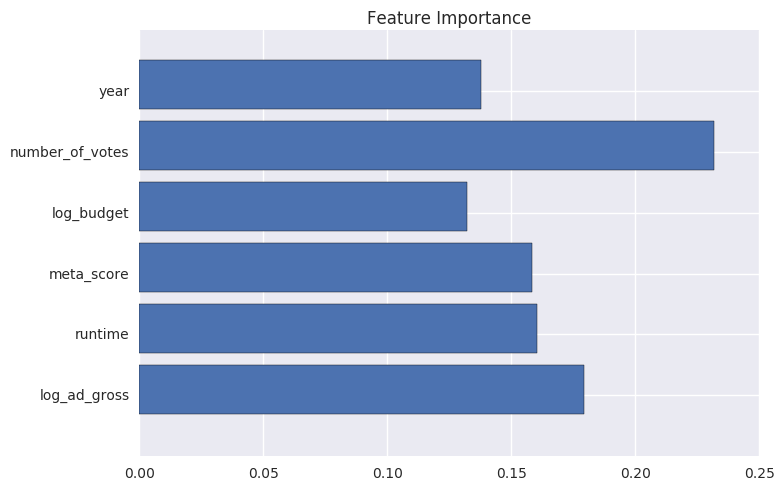

In [235]:
import ml_insights as mli
fig, ax = plt.subplots()
ind = np.array(range(len(X.columns)))+.7
plt.barh(ind,gbmodel1.feature_importances_);
ax.set_yticks(ind + .3);
ax.set_yticklabels((X_test.columns))
plt.title('Feature Importance')

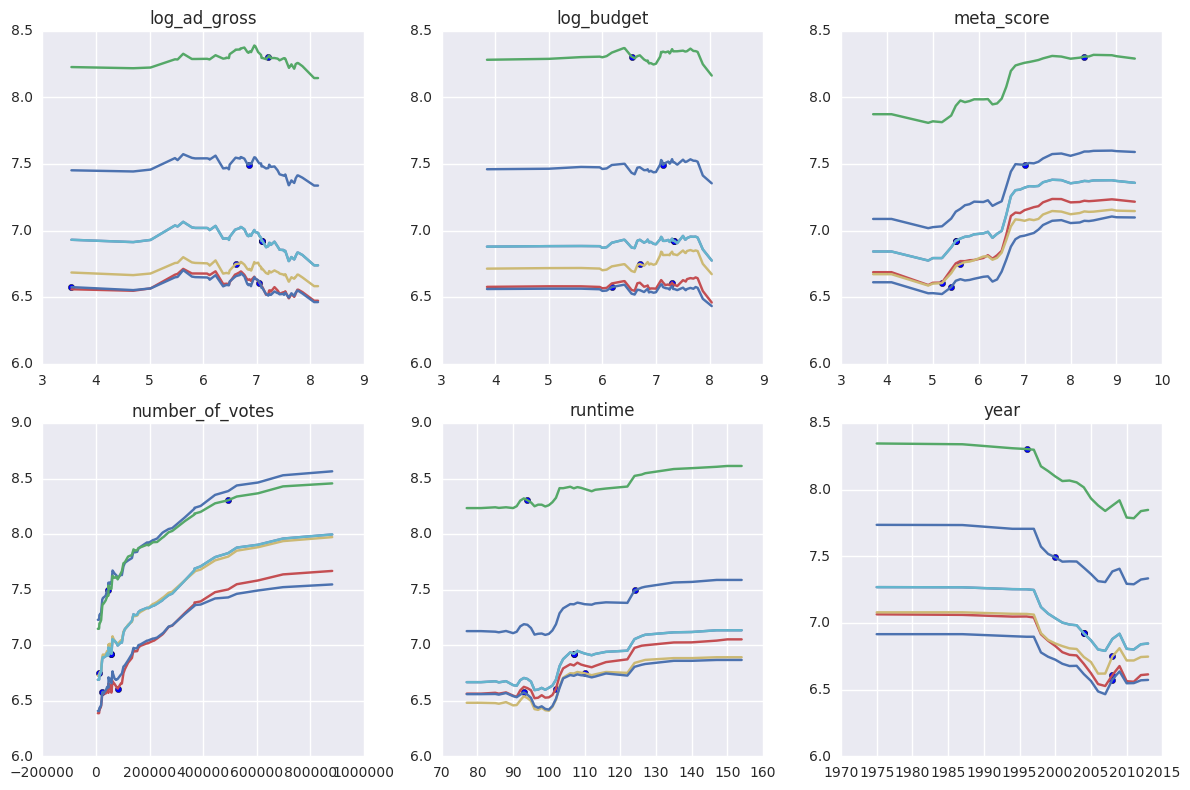

In [236]:
mxr = mli.ModelXRay(gbmodel1,X_test)
indices = mxr.feature_dependence_plots(num_pts=7, figsize = (20,20))

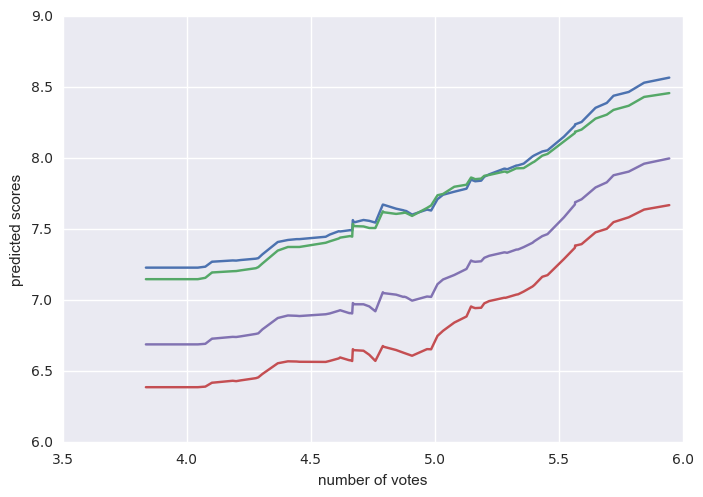

In [237]:
plt.plot(np.log10(mxr.results['number_of_votes'][0]), mxr.results['number_of_votes'][1][indices[0],:])
plt.plot(np.log10(mxr.results['number_of_votes'][0]), mxr.results['number_of_votes'][1][indices[1],:])
plt.plot(np.log10(mxr.results['number_of_votes'][0]), mxr.results['number_of_votes'][1][indices[2],:])
plt.plot(np.log10(mxr.results['number_of_votes'][0]), mxr.results['number_of_votes'][1][indices[3],:])
plt.xlabel('number of votes')
plt.ylabel('predicted scores')

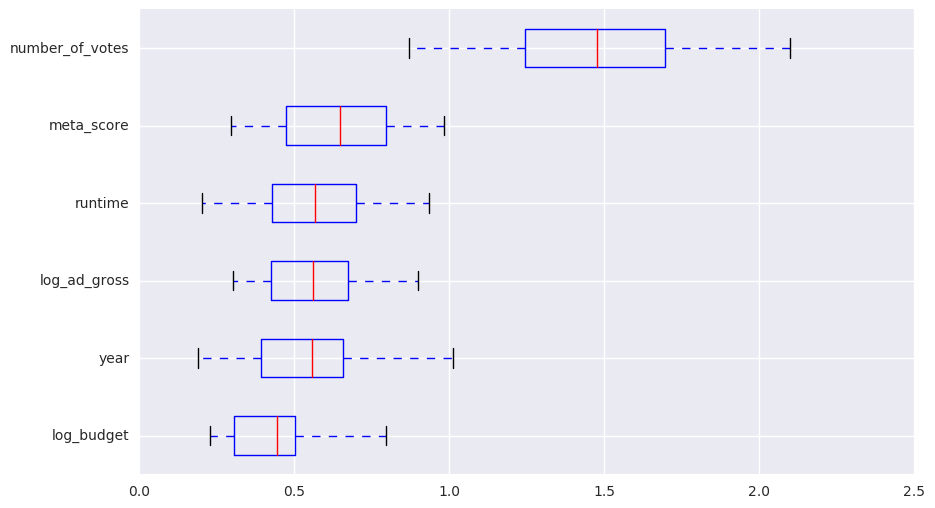

In [158]:
mxr.feature_effect_summary()

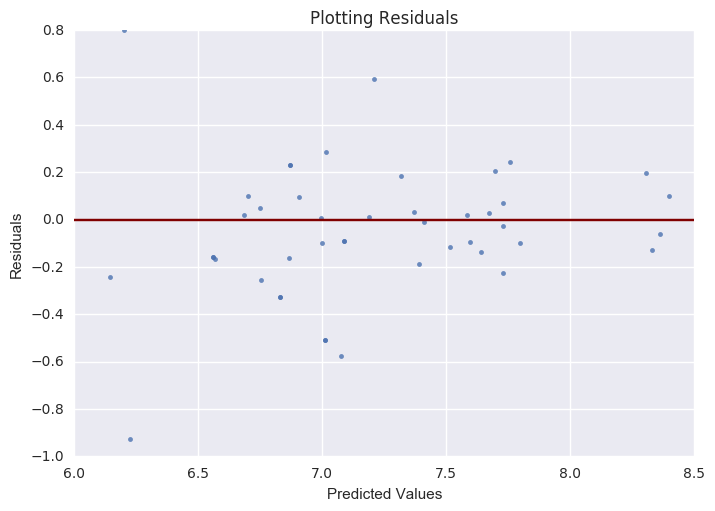

In [270]:
residuals = y_test - gb1_test_pred
plt.plot(gb1_test_pred,residuals,'.',alpha = 0.8)
plt.plot(np.linspace(6,8.5,100),np.zeros(100),'maroon')
plt.title('Plotting Residuals')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')


In [275]:
clean_df.loc[residuals.idxmax(),:]

movie_title        The Chumscrubber
meta_score                      4.1
number_of_votes               16499
imdb_score                        7
budget                      6.8e+06
gross                         49526
runtime                         108
year                           2005
imdb_votes                        7
Adjusted_gross                49526
Avg. Price                     6.41
rate                        0.74104
est_tickets                 7726.37
log_budget                  6.83251
log_ad_gross                4.69483
sqrt_num_votes              128.448
Name: 80, dtype: object

In [ ]:
clean_df.shape

In [ ]:
clean_df.corr().plot(kind = 'kde',figsize=(20, 4))

In [148]:
clean_df.iloc[0:3]

,movie_title,meta_score,number_of_votes,imdb_score,budget,gross,runtime,year,imdb_votes,Adjusted_gross,Avg. Price,rate,est_tickets,log_budget,log_ad_gross,sqrt_num_votes
0,Ghost World,8.8,98616.0,7.4,7000000.0,6200756,111,2001,7.4,6200756.0,5.66,0.654335,1.095540e+06,6.845098,6.792445,314.031846
1,(500) Days of Summer,7.6,390774.0,7.7,7500000.0,32391374,95,2009,7.7,32391374.0,7.50,0.867052,4.318850e+06,6.875061,7.510429,625.119189
2,Seven Psychopaths,6.6,192604.0,7.2,15000000.0,14989761,110,2012,7.2,14989761.0,7.96,0.920231,1.883136e+06,7.176091,7.175795,438.866722


In [166]:
df.shape

(250, 10)

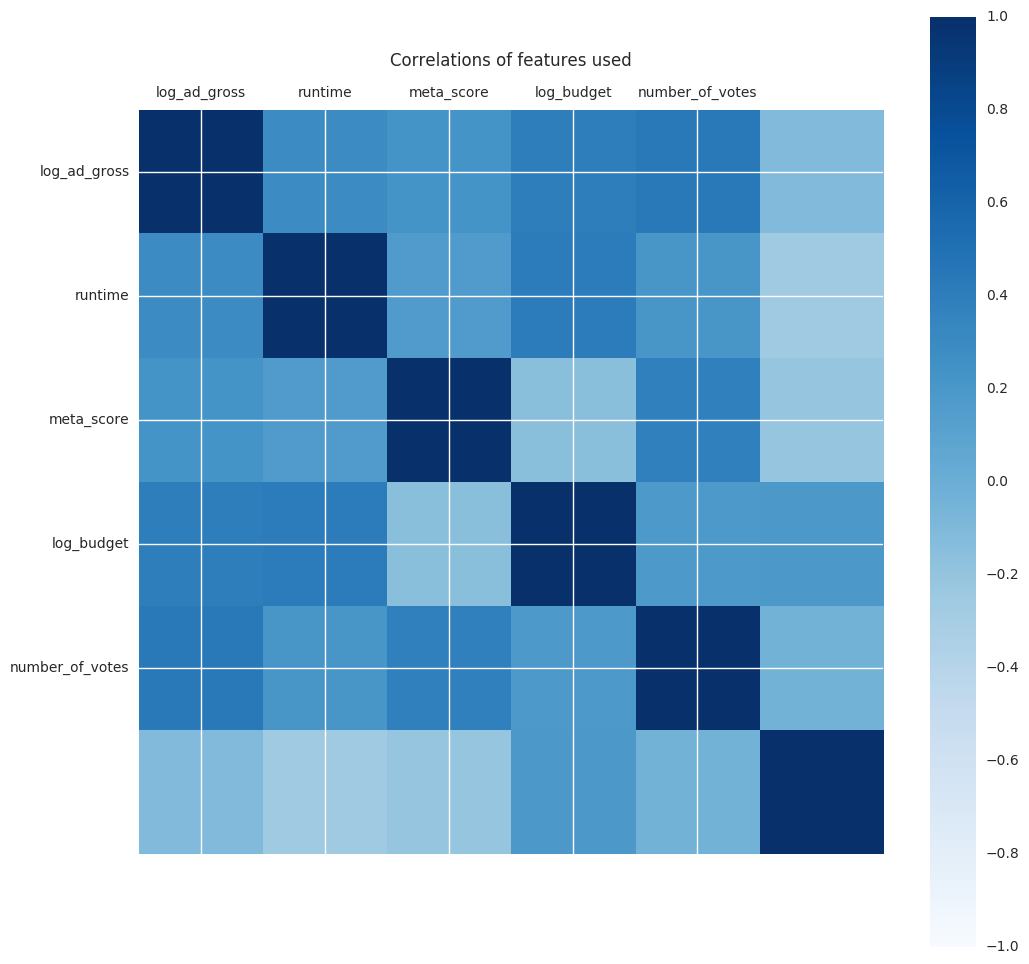

In [238]:
correlations = X.corr()
# plot correlation matrix
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1,cmap='Blues')
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features)
ax.set_yticklabels(features)
plt.title('Correlations of features used')
plt.show()

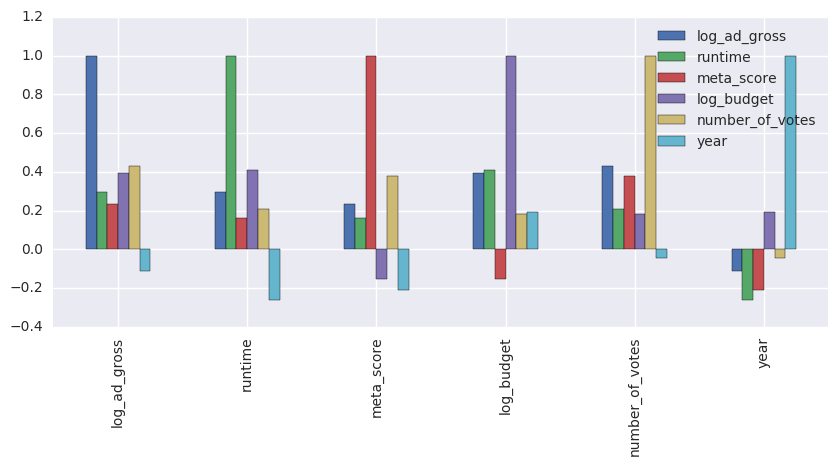

In [251]:
X.corr().plot(kind = 'bar',figsize=(10, 4))